In [1]:
import numpy as np
import torch
import sys
import matplotlib.pyplot as plt

sys.path.append('../models')
sys.path.append('..')
from generator import Generator
%matplotlib notebook

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint = torch.load('C:/Users/17175/Documents/Gradient_Refinement_GAN/pretrained_grad_generator.pth.tar')

<IPython.core.display.Javascript object>


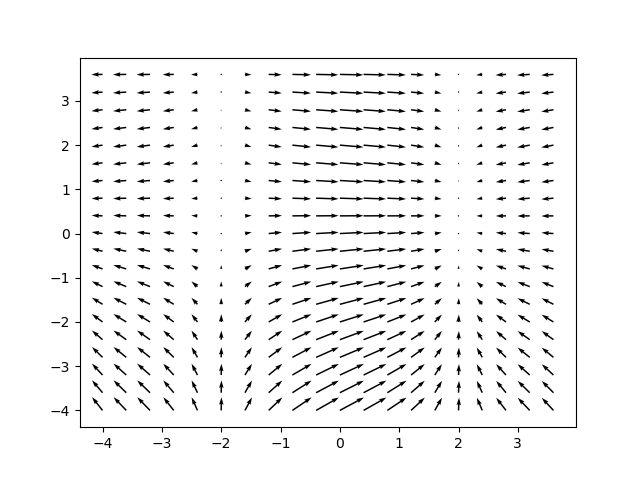

In [23]:
generator = checkpoint['generator'].to(device)
hr_grad = np.load('C:/Users/17175/Documents/Gradient_Refinement_GAN/Random_Surfaces/func_35.npy')
lr_grad = np.array([comp[::4, ::4] for comp in hr_grad])
fig, ax = plt.subplots()
grad = ax.quiver(lr_grad[0], lr_grad[1], lr_grad[3], lr_grad[4])

In [24]:
lr_grad = torch.unsqueeze(torch.from_numpy(lr_grad[-2:]), 0).to(device)
sr_grad = generator(lr_grad)
sr_grad = torch.squeeze(sr_grad)

In [25]:
sr_dx = sr_grad[-2].cpu().detach().numpy()
sr_dy = sr_grad[-1].cpu().detach().numpy()
print(sr_dx.shape)
print(sr_dy.shape)

(80, 80)
(80, 80)


<IPython.core.display.Javascript object>


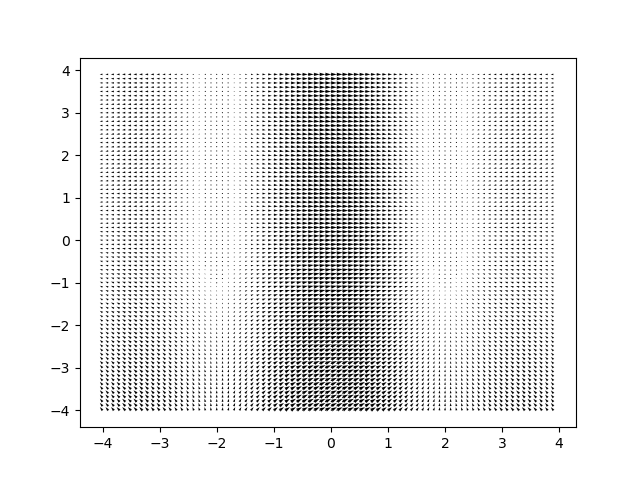

In [26]:
fig1, ax1 = plt.subplots()
grad = ax1.quiver(hr_grad[0], hr_grad[1], sr_dx, sr_dy)
plt.show()

<IPython.core.display.Javascript object>


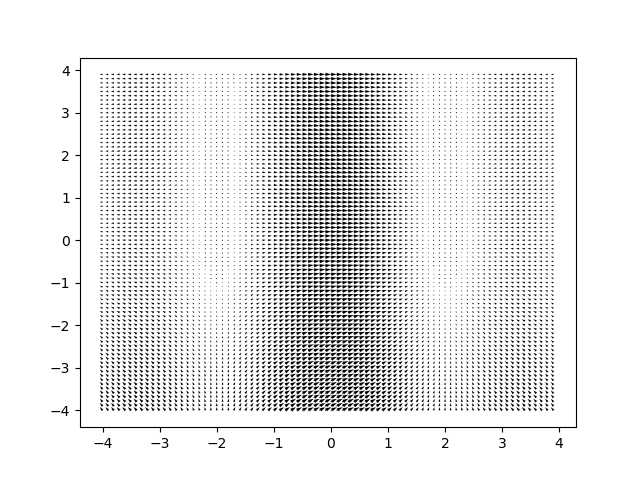

In [27]:
fig2, ax2 = plt.subplots()
grad = ax2.quiver(hr_grad[0], hr_grad[1], hr_grad[3], hr_grad[4])
plt.show()